In [153]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [35]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [36]:
a = np.arange(-10, 10, 1)
sig_transformed = sigmoid(a)

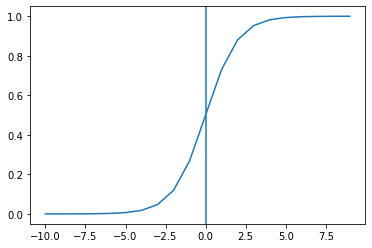

In [37]:
plt.plot(a, sig_transformed)
plt.axvline(0)

Text(0, 0.5, 'sigmoid loss')

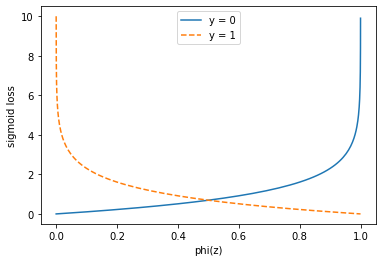

In [38]:
def cost_1(z):
    return - np.log(sigmoid(z))
def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)

phi_z = sigmoid(z)

plt.plot(phi_z, cost_0(z), label = "y = 0")
plt.plot(phi_z, cost_1(z), linestyle='--', label = "y = 1")
plt.legend()
plt.xlabel("phi(z)")
plt.ylabel("sigmoid loss")

In [155]:
class MyLogisticRegression:
    def __init__(self, eta, n_iter, random_state):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        r = np.random.RandomState(self.random_state)
        self.w_ = r.normal(loc=0.0, scale=0.01,
                           size=1 + X.shape[1])
        
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.activation(self.net_input(X))
            error = y - output
            
            self.w_[1:] += self.eta * X.T.dot(error)
            self.w_[0]  += self.eta * error.sum()
            
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
    
        return self
    
    def net_input(self, X):
        return self.w_[0] + np.dot(X, self.w_[1:])
#         return self.w_[0] + X.dot(self.w_[1:])

    def predict(self, X):
        return np.where(self.net_input(X) > 0, 1, 0)
        # or 
        # return np.where(self.activatoin(self.net_input(X) > 0.5), 1, 0)
        
    
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

In [109]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z,  alpha = 0.2, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [110]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [111]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [158]:
lr = MyLogisticRegression(eta = 0.05, n_iter = 7000, random_state=1)
lr.fit(X_train_01_subset, y_train_01_subset)

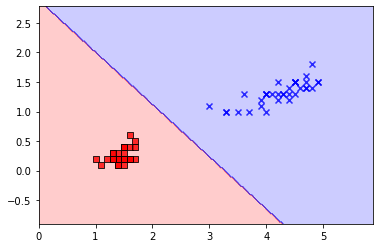

In [148]:
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lr)

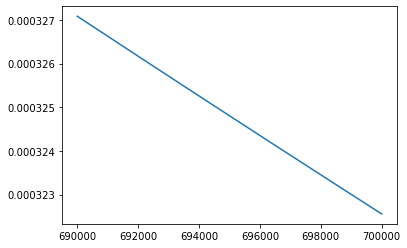

In [149]:
plt.plot(range(690001, lr.n_iter + 1, 1), lr.cost_[690000:])

# Test sklearn LogisticRegression

In [154]:
# scale the features
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [170]:
X_train_std.shape
# X_combined_std.shape
y_train.shape

(105,)

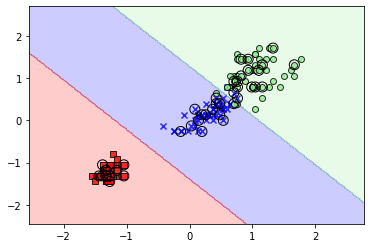

In [172]:
lr = LogisticRegression(C = 100, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))

In [178]:
lr.predict([X_test_std[0, :]])

array([2])

In [180]:
X_test_std[0, :].reshape(1, -1)

array([[1.66450633, 1.31392762]])